
# <span style="color:green">Project: Investigate a TMDB Dataset</span>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## <span style="color:green">Introduction</span>

**This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue. In below analysis tries to answer following questions**:

1. What is the Correlation between movies<br/>
    a. budget and revenue<br/>
    b. budget and vote_average<br/>
    c. budget and runtime<br/>
    d. runtime and vote_average<br/>
2. What is the decade vise vote_average trend?<br/>
3. Which are Top 5 highest vote average Productions?<br/>
4. Which are Top 5 average budget (Spending) Productions?<br/>
5. Which are Top 5 average revenue Productions?<br/>
6. Which are Top 5 Movie Genres based on number of movies of the genres made? <br/>
7. Geners of top 50 vote average movies to see which genre is more common in top 50 vote avg movies?<br/>
8. Which genre movie are in top 5 high budget? 
9. As Action looks to be one of the high spending gener, trying to find out how top 20 Action movies spending was over the years. Is average Action movies spending growing over th years?<br/>
10. Which Action movie(s) has/have caused this peak in spending in 2010?
11. Which genres are more common, Top 10 genres?

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## <span style="color:green">Data Wrangling</span>

In [13]:
#loading the data available in csv to a pandas DataFrame object
df_movies_start = pd.read_csv('tmdb-movies.csv')

In [14]:
#checking the general properties of the data by inspecting a few lines
df_movies_start.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [15]:
#Checking number of rows and columns in the dataframe
df_movies_start.shape

(10866, 21)

In [16]:
#checking for duplicates
df_movies_start[df_movies_start.duplicated()]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [17]:
#Dropping the duplicate row
df_movies_start.drop_duplicates(keep='first', inplace=True)

In [18]:
#Splitting genres and expanding the dataframe with separate genres a movie belongs to
df_movies_genres_expand =df_movies_start.drop('genres', axis=1).join(df_movies_start['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genres'))

In [19]:
#This shows which all columns have null values in them. 
df_movies_start.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [20]:
# As some of the questions stated above are related to genre, will check on the genre data for null values
df_movies_start[df_movies_start['genres'].isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [21]:
# As for movies which do not have genre also do not contain valid budget and revenue values, so it seems better to drop
# these movies from the analysis, also these are quite less(23) in comparison to total number(10866)

df_movies_start.dropna(subset=['genres'], inplace=True)


In [22]:
#Checking which columns contain 0 value
for c in df_movies_start.columns:
    if (df_movies_start[str(c)] == 0).any():
        print(str(c) + " has 0")

budget has 0
revenue has 0
runtime has 0
budget_adj has 0
revenue_adj has 0


**Lot of questions require budget and revenue details to answer, checking on how many movies have 0 budget and revenue below
shows 5000+ movies do not have budget and revenue data. Since this a huge number, not throwing the data out of the analysis
and replacing these 0 values with average budget and average revenue values**

In [23]:
df_movies_start[df_movies_start['budget']==0].count()

id                      5674
imdb_id                 5667
popularity              5674
budget                  5674
revenue                 5674
original_title          5674
cast                    5610
homepage                1224
director                5636
tagline                 3483
keywords                4530
overview                5671
runtime                 5674
genres                  5674
production_companies    4794
release_date            5674
vote_count              5674
vote_average            5674
release_year            5674
budget_adj              5674
revenue_adj             5674
dtype: int64

In [24]:
budget_mean = df_movies_start.budget.mean()
revenue_mean = df_movies_start.revenue.mean()

In [25]:
#Replacing 0 budget with budget mean and 0 revenue with revenue_mean
df_movies_start['budget'].replace(0, budget_mean, inplace=True)
df_movies_start['revenue'].replace(0, revenue_mean, inplace=True)

<a id='eda'></a>
## <span style="color:green">Exploratory Data Analysis</span>

###  Question1 : Correlation Checks

**1. Corrleation check between *budget* and *revenue***

In [26]:
df_movies_start.budget.corr(df_movies_start.revenue)

0.7053499678417832

**2. Corrleation check between *budget* and *vote_average***

In [27]:
df_movies_start.budget.corr(df_movies_start.vote_average)

0.07450170786868507

**3. Corrleation check between *budget* and *runtime***

In [28]:
df_movies_start.budget.corr(df_movies_start.runtime)

0.17133571661571223

**4. Corrleation check between *runtime* and *vote_average***

In [29]:
df_movies_start.runtime.corr(df_movies_start.vote_average)

0.15803338472326275

### Question 2: What is the decade vise vote_average trend ?<br/>
There is a possibility that average vote may reduce/get leveled with more number of samples, so plotting this vis-a-vis number of votes 

In [30]:
# Filtering the data frames below for each decade
df_60s = df_movies_start[(df_movies_start.release_year >= 1960) & (df_movies_start.release_year < 1970)]
df_70s = df_movies_start[(df_movies_start.release_year >= 1970) & (df_movies_start.release_year < 1980)]
df_80s = df_movies_start[(df_movies_start.release_year >= 1980) & (df_movies_start.release_year < 1990)]
df_90s = df_movies_start[(df_movies_start.release_year >= 1990) & (df_movies_start.release_year < 2000)]
df_2000s = df_movies_start[(df_movies_start.release_year >= 2000) & (df_movies_start.release_year < 2010)]
df_2010s = df_movies_start[(df_movies_start.release_year >= 2010) & (df_movies_start.release_year < 2020)]

In [31]:
# Creating an array of each decade vote_average
decade_avg_vote = np.array([df_60s['vote_average'].mean(), df_70s['vote_average'].mean(), df_80s['vote_average'].mean(), df_90s['vote_average'].mean(), 
df_2000s['vote_average'].mean(), df_2010s['vote_average'].mean()])

In [32]:
# Creating an array of each decade total vote count
decade_total_vote_count = np.array([df_60s['vote_count'].sum(), df_70s['vote_count'].sum(), df_80s['vote_count'].sum(), df_90s['vote_count'].sum(), 
df_2000s['vote_count'].sum(), df_2010s['vote_count'].sum()])

In [33]:
decade_total_vote_count

array([  25563,   55451,  130743,  316160,  781723, 1052004], dtype=int64)

Text(0.5,1,'Avg Vote and Total Vote vs Decade chart')

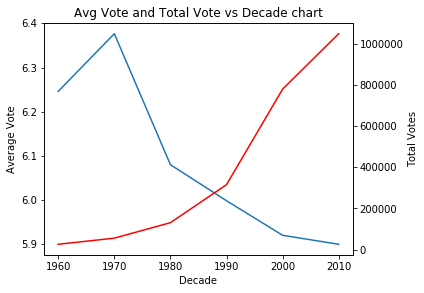

In [86]:
# Plotting the vote_average and total vote_count for last decades
decade_vote_df = pd.DataFrame.from_dict({'vote_avg': decade_avg_vote,  'decade': np.array(['1960', '1970', '1980', '1990', '2000','2010']), 'vote_count': decade_total_vote_count})
fig, ax1 = plt.subplots()
ax1.plot(decade_vote_df.decade,decade_vote_df.vote_avg)
ax1.set_xlabel('Decade')
ax1.set_ylabel('Average Vote')
ax2=ax1.twinx()
ax2.plot(decade_vote_df.decade,decade_vote_df.vote_count, color='r')
ax2.set_ylabel('Total Votes')
fig.tight_layout()
ax1.set_title("Avg Vote and Total Vote vs Decade chart")

### Question 3: Top 5 Vote_Average Productions

In [35]:
# grouping the data based on production companies
movies_grouped_production = df_movies_start.groupby('production_companies', sort=True)

In [36]:
# calculating mean vote_average for production companies
production_with_mean_vote = movies_grouped_production['vote_average'].agg(np.mean)

In [87]:
# picking out top 5 proudction companies based on high mean vote_average
production_with_mean_vote.sort_values(ascending=False).head(5)

production_companies
SMV Enterprises|Columbia Music Video|EMI                                                           8.7
Red Bull Media House|Brain Farm Digital Cinema                                                     8.5
Miramax Films|British Film Institute (BFI)                                                         8.5
Edel records GmbH                                                                                  8.5
Eficine 226|Beanca Films|Fondo de InversiÃ³n y EstÃ­mulos al Cine (FIDECINE)|MPN Cologne Film 3    8.4
Name: vote_average, dtype: float64

### Question 4:  Top 5 average budget (Spending) Productions

In [38]:
# calculating mean budget for production companies grouped data
production_with_mean_budget = movies_grouped_production['budget'].agg(np.mean)

In [39]:
# picking out top 5 production companies based mean budget
production_with_mean_budget.sort_values(ascending=False).head(5)

production_companies
Boram Entertainment Inc.                                                     425000000.0
Walt Disney Pictures|Jerry Bruckheimer Films|Moving Picture Company (MPC)    380000000.0
Marvel Studios|Prime Focus|Revolution Sun Studios                            280000000.0
DC Comics|Legendary Pictures|Warner Bros.|Bad Hat Harry Productions          270000000.0
Columbia Pictures|Laura Ziskin Productions|Marvel Enterprises                258000000.0
Name: budget, dtype: float64

### Question 5: Top 5 average revenue Productions

In [40]:
# calculating mean revenue for production companies grouped data
production_with_mean_revenue = movies_grouped_production['revenue'].agg(np.mean)

In [41]:
# picking out top 5 production companies based mean revenue
production_with_mean_revenue.sort_values(ascending=False).head(5)

production_companies
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2.781506e+09
Lucasfilm|Truenorth Productions|Bad Robot                                                                     2.068178e+09
Paramount Pictures|Twentieth Century Fox Film Corporation|Lightstorm Entertainment                            1.845034e+09
Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu                      1.513529e+09
Universal Pictures|Original Film|Media Rights Capital|Dentsu|One Race Films                                   1.506249e+09
Name: revenue, dtype: float64

#### Above Top 5 productions stats pulled out to see if Productions who have higher spending are also the one getting higher vote average. Also, to see if Productions with higher spending are also the one with higher revenue 

### Question 6: Top 5 Movie Genres based on number of movies of the genres made

Text(0,0.5,'number of movies')

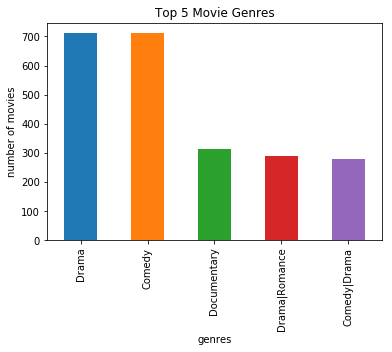

In [84]:
df_movies_start['genres'].value_counts()
df_movies_start['genres'].value_counts().head(5).plot(kind = 'bar')
plt.title("Top 5 Movie Genres")
plt.xlabel("genres")
plt.ylabel("number of movies")

Text(0.5,1,'Overall Top Movie Genres')

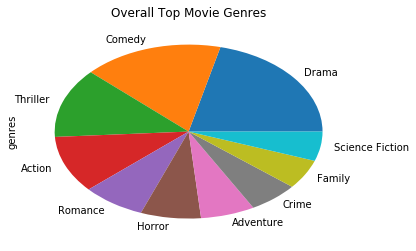

In [85]:
# As many of movies have multiple genres associated with them, so it may be a good idea to use the expanded dataframe and
# then analyse the genres.
df_movies_genres_expand.genres.value_counts().head(10).plot(kind='pie')
plt.title("Overall Top Movie Genres")


### Question 7: Geners of top 50 vote average movies to see which genre is more in top 50 vote avg movies

Text(0,0.5,'number of movies')

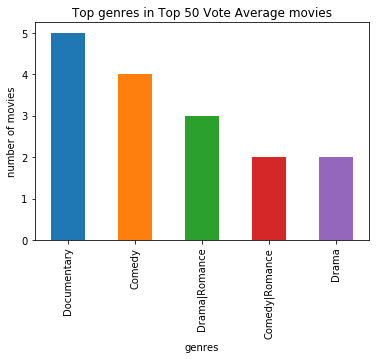

In [88]:
# Sorting the vote_average column and then indices of tpo 50 of these vote_average to identify genres
top_50_high_voted = df_movies_start.vote_average.sort_values(ascending=False).head(50)
df_movies_top_50 = df_movies_start.iloc[top_50_high_voted.index.tolist(), :]
df_movies_top_50['genres'].value_counts().head().plot(kind = 'bar')
plt.title("Top genres in Top 50 Vote Average movies")
plt.xlabel("genres")
plt.ylabel("number of movies")

### Question 8: Which genre movie are in top 5 high budget? 

In [44]:
# pulling out a data frame of budget, genres and release_year to check top genres comparison with budget spent. Also for using this
# data for year vise plot in Q9 below
df_budget_genres = df_movies_start[['budget', 'genres','release_year']]
df_budget_genres[df_budget_genres.index.isin(df_budget_genres.budget.sort_values(ascending=False).head(100).index)].genres.value_counts().head()

Action|Adventure|Science Fiction            5
Action|Adventure|Fantasy                    5
Adventure|Fantasy|Action                    4
Action|Adventure|Fantasy|Science Fiction    4
Action|Science Fiction|Adventure            4
Name: genres, dtype: int64

### Question 9: As Action looks to be one of the high spending genre, trying to find out how top 20 Action movies spending was over the years. Is average Action movies spending growing over th years?

In [45]:
Action_index_list =  df_budget_genres[df_budget_genres.genres.str.contains('Action')].budget.sort_values(ascending=False).index

In [46]:
df_top20_budget_action = df_budget_genres[df_budget_genres.index.isin(Action_index_list[0:20])]

Text(0,0.5,'Spending in billion')

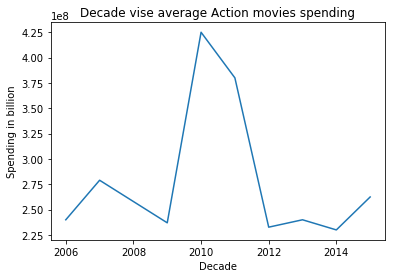

In [82]:
df_top20_budget_action.groupby('release_year', sort=True).budget.agg(np.mean).plot(kind='line')
plt.title("Decade vise average Action movies spending")
plt.xlabel("Decade")
plt.ylabel("Spending in billion")

## Question 10: Which movie(s) has/have caused this peak in 2010?

In [50]:
df_movies_start[df_movies_start.index.isin(Action_index_list[0:20])][df_movies_start.release_year==2010]

C:\Users\Nafeez Quraishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,46528,tt1032751,0.25054,425000000.0,11087569.0,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,http://www.iamrogue.com/thewarriorsway,Sngmoo Lee,Assassin. Hero. Legend.,...,An Asian assassin (Dong-gun Jang) is forced to...,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425000000.0,11087569.0


<a id='conclusions'></a>
## <span style="color:green">Conclusions</span>

## Q1:
**Budget has a good correlation with Revenue. Higher revenue is expected for higher budget movies to recover the cost so this does not look to be unusual. **

## Q2:
**1970s movies received highest average vote. And also, with increasing number of votes it seems average vote has been decreasing usually with an exception of 1970. While, total votes growth has been multi fold decade after decade but average vote though declines but does not vary much. Still this needs more analysis/data gathering to understand this decrease in average vote. **

## Q3, Q4, Q5: 

**This analysis did not show that top-5 high budget spending and top-5 high revenue productions are also the productions who got highest vote average.**

## Q6:
**Commedy and Drama look to be top genres overall in terms of number of movies made of the genres**

## Q7:

**When top genres analysis is done on top 50 high vote average movies, documentry genre seems to have come ahead of Commedy and Drama**

## Q8:
**Top 5 high budget movies genre analysis shows, action and adventure as high spending genres which is kind of expected. 

## Q9, Q10:
**Actions movies seem to have one highest budget with some exceptions, and spending does not seem to have a definitive increasing or decreasing trend. In 2010 there is a exceptional high bump in budget seems to have caused due to spending in The Warrior's way.
**https://www.decluttr.com/blog/2018/02/13/what-is-the-most-expensive-movie-ever-made/ mentions, highest ever budget movie had 400m budget.The Warrior's Way above looks to have $425m budget and based on the corresponding revenue it seems to be a big flop.

## Limitations

**DataSet has very high number of rows without budget and revenue data (5000+), this was replaced with mean budget and revenue which has affected the analysis. **